**Goal**  
    - predict if water is safe for human consumption  
**Data**    
    - [Kaggle water quality dataset](https://www.kaggle.com/adityakadiwal/water-potability)  
**Analysis**  
    - Data cleaning  
    - EDA  
    - Machine learning **methods**     
        1. logistic regression,   
        2. decision tree,  
        3. random forest,  
        4. SVM,  
        5. KNN  
**Evaluation/Measurement**    
    - Accuracy, precision, F1 score  
**Output**    
    - result (which algorithm performs the best)  
    - application (for health department or similar to reduce time/human efforts)  
    - future work     

In [278]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import KFold
from sklearn.metrics import f1_score
from collections import defaultdict
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [3]:
data = pd.read_csv("water_potability.csv")

In [189]:
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [6]:
data.info()
#there are several null values in the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [26]:
for col in data.columns:
    print('percentage of missing values in ', col, 'is ', 100*sum(data[col].isnull())/len(data))

percentage of missing values in  ph is  14.987789987789988
percentage of missing values in  Hardness is  0.0
percentage of missing values in  Solids is  0.0
percentage of missing values in  Chloramines is  0.0
percentage of missing values in  Sulfate is  23.84004884004884
percentage of missing values in  Conductivity is  0.0
percentage of missing values in  Organic_carbon is  0.0
percentage of missing values in  Trihalomethanes is  4.945054945054945
percentage of missing values in  Turbidity is  0.0
percentage of missing values in  Potability is  0.0


In [5]:
data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [11]:
#check if classes are imbalanced
data['Potability'].value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

In [57]:
#correlation between variables
X = data.iloc[:,:-1]
y = data.iloc[:,-1]
X.corr()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
ph,1.000000,0.082096,-0.089288,-0.034350,0.018203,0.018614,0.043503,0.003354,-0.039057
Hardness,0.082096,1.000000,-0.046899,-0.030054,-0.106923,-0.023915,0.003610,-0.013013,-0.014449
Solids,-0.089288,-0.046899,1.000000,-0.070148,-0.171804,0.013831,0.010242,-0.009143,0.019546
Chloramines,-0.034350,-0.030054,-0.070148,1.000000,0.027244,-0.020486,-0.012653,0.017084,0.002363
Sulfate,0.018203,-0.106923,-0.171804,0.027244,1.000000,-0.016121,0.030831,-0.030274,-0.011187
Conductivity,0.018614,-0.023915,0.013831,-0.020486,-0.016121,1.000000,0.020966,0.001285,0.005798
Organic_carbon,0.043503,0.003610,0.010242,-0.012653,0.030831,0.020966,1.000000,-0.013274,-0.027308
Trihalomethanes,0.003354,-0.013013,-0.009143,0.017084,-0.030274,0.001285,-0.013274,1.000000,-0.022145
Turbidity,-0.039057,-0.014449,0.019546,0.002363,-0.011187,0.005798,-0.027308,-0.022145,1.000000


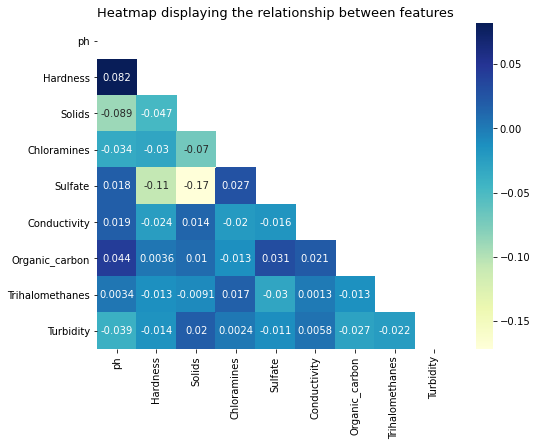

In [146]:
#correlation heatmap
plt.figure(figsize=(8,6))
msk = np.zeros_like(X.corr())
msk[np.triu_indices_from(msk)] = True
sns.heatmap(X.corr(), mask = msk, cmap="YlGnBu", annot=True,)
plt.title('Heatmap displaying the relationship between features',
         fontsize=13)
plt.show()

There is no strong correlation between any 2 variables, except for Sulfate and Solids(TDS) with a slightly strong negative correlation (-0.17). 

In [235]:
#split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

y_train = np.array(y_train)
y_test = np.array(y_test)

In [236]:
#fill missing value with mean of each variable - Simple Imputation
simputer = SimpleImputer(strategy='mean')
X_train = simputer.fit_transform(X_train)
X_test = simputer.transform(X_test)

In [238]:
#feature scaling since variables are on different scale from previous step
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

In [239]:
#checking for outliers
print(np.count_nonzero(np.abs(X_train_norm) > 3, axis=0)) #number of outliers in each feature
print(np.count_nonzero(np.abs(X_train_norm) > 3)/X_train_norm.shape[0]) #percentage of outliers of entire training set
#since it's not clear that these outliers are due to data entry error, I decided to keep them

[18 12 16 16 28  7  3 16  7]
0.050061050061050064


#### Logistic Regression, Linear SVM

In [293]:
#generate 10-fold cross-validation sets
kf = KFold(n_splits=5, shuffle = True, random_state=123)
C_vals = [0.001,0.01,0.1,1,10,100]
gamma_vals = [10e-5,10e-4,10e-3]
acc_scores = defaultdict(list)
F1_scores = defaultdict(list)



for train_index, val_index in kf.split(X_train_norm):
    #print("TRAIN:", train_index, "TEST:", val_index)
    X_train_cv, X_val = X_train_norm[train_index], X_train_norm[val_index]
    y_train_cv, y_val = y_train[train_index], y_train[val_index]
    
    #decision tree
    clf = DecisionTreeClassifier(random_state=0)
    clf.fit(X_train_cv,y_train_cv)
    tree_pred = clf.predict(X_val)
    acc_scores['tree'].append(clf.score(X_val,y_val))
    F1_scores['tree'].append(f1_score(y_val, tree_pred))
    
    for c in C_vals:
        #logistic regression        
        logReg = LogisticRegression(C = c)
        logReg.fit(X_train_cv,y_train_cv)
        y_pred = logReg.predict(X_val)
        acc_scores[f'logReg_C={c}'].append(logReg.score(X_val,y_val))
        F1_scores[f'logReg_C={c}'].append(f1_score(y_val, y_pred))

        #linear svm
        lsvc = LinearSVC(C=c,max_iter=10000)
        lsvc.fit(X_train_cv,y_train_cv)
        y_pred_svc = lsvc.predict(X_val)
        acc_scores[f'linearSVC_C={c}'].append(lsvc.score(X_val,y_val))
        F1_scores[f'linearSVC_C={c}'].append(f1_score(y_val, y_pred_svc))
        
        #rbf svm
        for g in gamma_vals:
            rbf = SVC(C=c,max_iter=-1, gamma=g)
            rbf.fit(X_train_cv,y_train_cv)
            y_pred_rbf = rbf.predict(X_val)
            acc_scores[f'rbf_C={c}_gamma={g}'].append(rbf.score(X_val,y_val))
            rbf_F1[f'rbf_C={c}_gamma={g}'].append(f1_score(y_val, y_pred_rbf))

        
        

/Users/hangxin/opt/anaconda3/envs/experiment/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/hangxin/opt/anaconda3/envs/experiment/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/hangxin/opt/anaconda3/envs/experiment/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/hangxin/opt/anaconda3/envs/experiment/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/hangxin/opt/anaconda3/env

In [282]:
tree_acc

[0.5670731707317073,
 0.5833333333333334,
 0.5804480651731161,
 0.6130346232179226,
 0.5580448065173116]

In [287]:
"{}_is_{}".format("二宝", "胖胖 ")

a='123'
b='456'

print(f"{a} is {b}")


123 is 456


#### Decision Tree

In [ ]:
C_vals = [0.001,0.01,0.1,1,10,100]
for C in C_vals:
    

In [97]:
logReg = LogisticRegression()
logReg.fit(X_train,y_train)

LogisticRegression()

In [99]:
predictions = logReg.predict(X_test)

In [98]:
score = logReg.score(X_test, y_test)
print(score)

0.6166056166056166
